<a href="https://colab.research.google.com/github/Stanley2204/TugasDataMining/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name - NIM**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [58]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression  # Example ML model
from sklearn.metrics import mean_squared_error  # For evaluating models
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Load Dataset

In [59]:
url = "https://raw.githubusercontent.com/Stanley2204/TugasDataMining/refs/heads/main/view.csv"
df = pd.read_csv(url, sep=";")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [61]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [62]:
col_names = ['age',	'job', 'marital',	'education',	'default',	'balance',	'housing',	'loan',	'contact',	'day',	'month',	'duration',	'campaign',	'pdays',	'previous',	'poutcome',	'y']
for col in col_names:
  print(df[col].value_counts())
  print("\n")

age
34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: count, Length: 67, dtype: int64


job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64


marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64


education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64


default
no     4445
yes      76
Name: count, dtype: int64


balance
0       357
2        24
1        15
4        13
5        11
       ... 
539       1
1041      1
464       1
7702      1
1137      1
Name: count, Length: 2353, dtype: int64


housing
yes    2559
no     1962
Name: count, dtype: int64


loan
no     3830
yes     691
Name: count, dtype: int64


contac

In [63]:
df.drop(df[df['education'] == 'unknown'].index, inplace = True)
df.drop(df[df['job'] == 'unknown'].index, inplace = True)
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


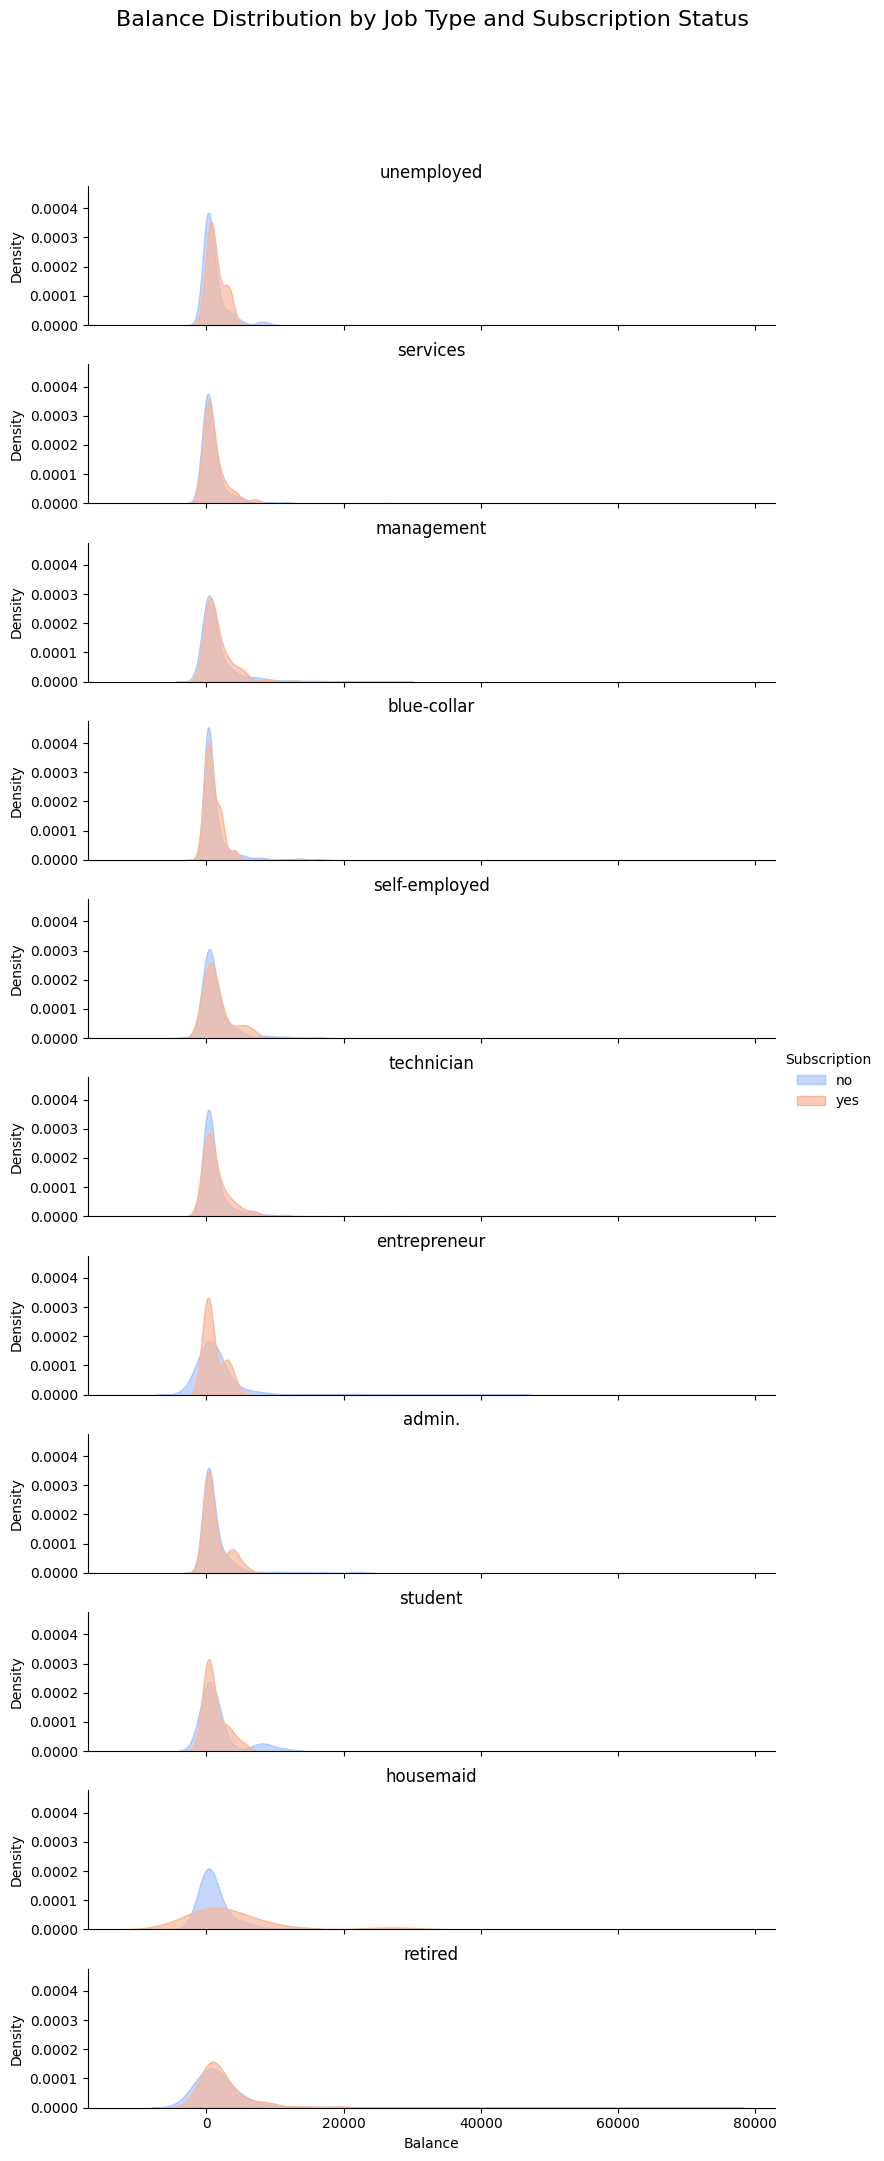

In [64]:
# Set up the FacetGrid with job as the row variable and subscription as the hue
g = sns.FacetGrid(df, row='job', hue='y', aspect=4, height=2, palette='coolwarm')

# Map a KDE plot onto each facet
g.map(sns.kdeplot, 'balance', fill=True, common_norm=False, alpha=0.7)

# Add a legend and titles
g.add_legend(title='Subscription')
g.set_axis_labels('Balance', 'Density')
g.set_titles(row_template="{row_name}", size=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Balance Distribution by Job Type and Subscription Status', fontsize=16)

plt.show()

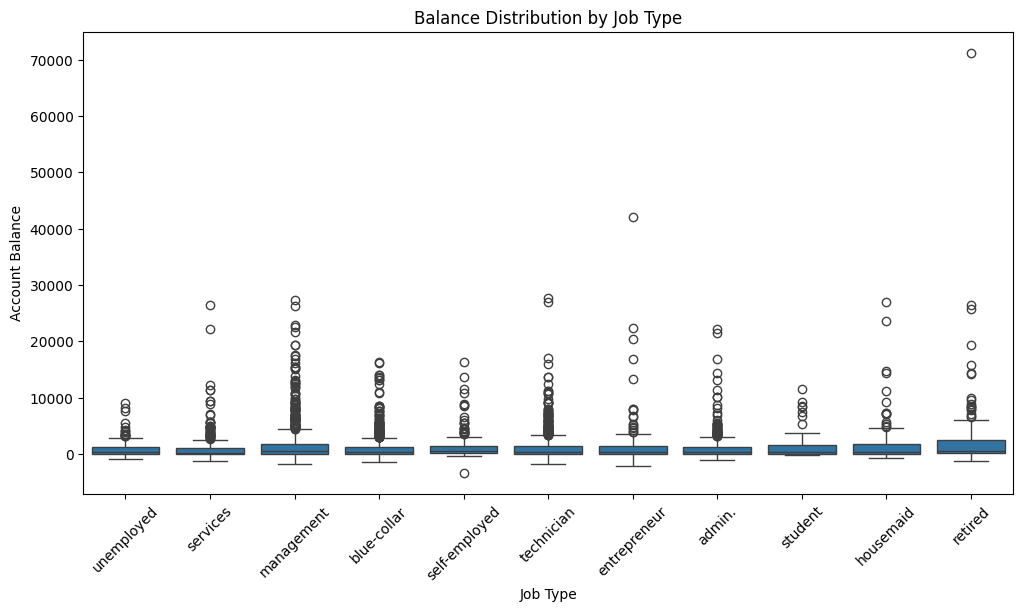

In [65]:
# Box plot for balance by job type
plt.figure(figsize=(12, 6))
sns.boxplot(x='job', y='balance', data=df)
plt.title('Balance Distribution by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Account Balance')
plt.xticks(rotation=45)
plt.show()

In [66]:
# Combine 'admin' and 'management' into a single category 'admin_management'
df['job'] = df['job'].replace(['admin', 'management'], 'admin_management')

# Verify the changes
print(df['job'].value_counts())

job
admin_management    942
blue-collar         905
technician          746
admin.              461
services            404
retired             216
self-employed       179
entrepreneur        157
unemployed          126
housemaid           107
student              68
Name: count, dtype: int64


In [67]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Verify encoding
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,1,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,1,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,2,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


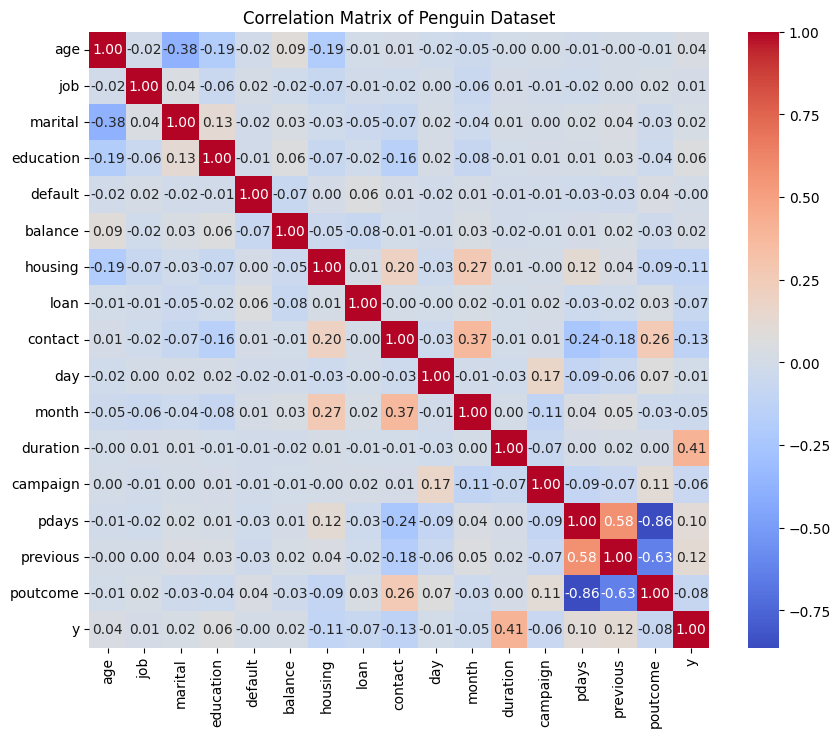

Conclusion:
The heatmap shows the correlation between different features of the dataset.
Strong positive correlations are indicated by values close to 1.
Strong negative correlations are indicated by values close to -1.
For example, there is a strong positive correlation between body mass and flipper length, which suggests that penguins with longer flippers tend to have higher body mass.


In [68]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Penguin Dataset')
plt.show()

print("Conclusion:")
print("The heatmap shows the correlation between different features of the dataset.")
print("Strong positive correlations are indicated by values close to 1.")
print("Strong negative correlations are indicated by values close to -1.")
print("For example, there is a strong positive correlation between body mass and flipper length, which suggests that penguins with longer flippers tend to have higher body mass.")

## Machine Learning

In [69]:
X = df.drop('y', axis=1)
y = df['y']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (3448, 16)
X_test shape: (863, 16)


## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
y_pred_entropy = rf_clf.predict(X_test)

In [75]:
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy (RandomForestClassifier): {accuracy_entropy}")

Accuracy (RandomForestClassifier): 0.9200463499420626


In [77]:

# prompt: Confusion matrix and classification report of criterion Entropy and Gini index

# Confusion matrix for Entropy
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix (Entropy):\n", cm_entropy)

Confusion Matrix (Entropy):
 [[763  13]
 [ 56  31]]


In [78]:
# Classification report for Entropy
cr_entropy = classification_report(y_test, y_pred_entropy)
print("Classification Report (Entropy):\n", cr_entropy)

Classification Report (Entropy):
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       776
           1       0.70      0.36      0.47        87

    accuracy                           0.92       863
   macro avg       0.82      0.67      0.72       863
weighted avg       0.91      0.92      0.91       863



## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gbc_clf = GradientBoostingClassifier(
    n_estimators=100,       # Number of boosting stages
    learning_rate=0.1,      # Learning rate
    random_state=42,        # Seed for reproducibility
    max_features=3          # Maximum features considered at each split
)

# Fit the model on the training data
gbc_clf.fit(X_train, y_train)

# Make predictions
y_pred = gbc_clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9107763615295481
Confusion Matrix:
 [[754  22]
 [ 55  32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       776
           1       0.59      0.37      0.45        87

    accuracy                           0.91       863
   macro avg       0.76      0.67      0.70       863
weighted avg       0.90      0.91      0.90       863



In [81]:
accuracy_entropy = accuracy_score(y_test, y_pred)
print(f"Accuracy (GradientBoostingClassifier): {accuracy_entropy}")

Accuracy (GradientBoostingClassifier): 0.9107763615295481
